In [1]:
import sys
import os

sys.path.append(os.path.abspath("Datasets"))

# Moore's Law
- Linear regression: many problems, even don't seem linear at first
- Discover "correlation" in Data
- When it's exponential, use Log -> Linear

# 1-D Linear Regression:
1. Define the model in 1-D, derive the solution

- Starts with training samples:
- Inputs: x1, x2, ..., xN
- Outputs: y1, y2, ..., yN => Supervised learning

- Coding 1D Solution (See notes 1_ for more details)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
X = []
Y = []
for line in open("Datasets/data_1d.csv"):
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

In [9]:
# Turn X, Y to numpy array
X = np.array(X)
Y = np.array(Y)

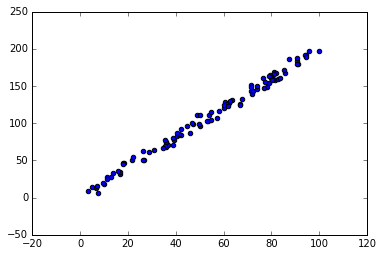

In [10]:
plt.scatter(X, Y)

- Apply Equation we learned to calculate a and b (y^ = ax + b)

In [13]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

In [14]:
# Calculate y^ = ax + b
y_hat = a*X + b

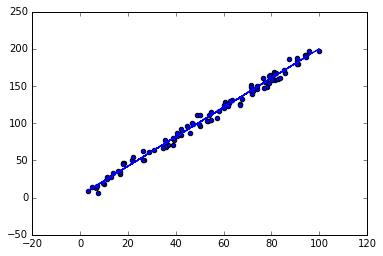

In [16]:
# Plot all:
plt.scatter(X, Y)
plt.plot(X, y_hat)

## R-squared for model prediction
- See note 2_


In [19]:
d1 = Y - y_hat
d2 = Y - Y.mean()

r2 = 1 - d1.dot(d1) / d2.dot(d2)
r2

0.99118382029778052

- We see that the result is very close to 1, so it's a good model

## Now the Moore's Law implementation

In [20]:
import re
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
X = []
Y = []

non_decimal = re.compile(r'[^\d]+')

for line in open('Datasets/moore.csv'):
    r = line.split('\t')
    
    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    
    X.append(x)
    Y.append(y)

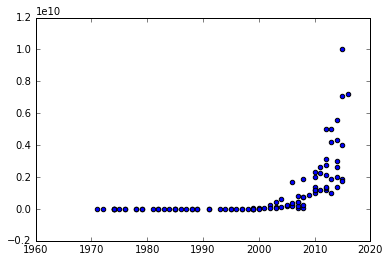

In [25]:
# Convert to numpy array
X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)

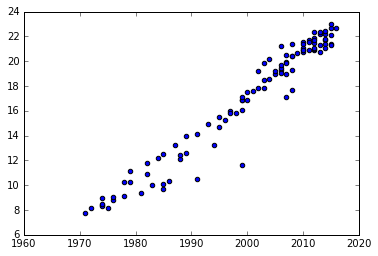

In [26]:
Y = np.log(Y)
plt.scatter(X, Y)

- We see that now it becomes linear

In [27]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

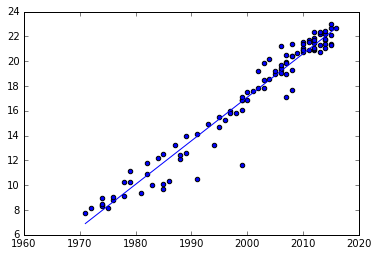

In [28]:
Y_hat = a*X + b

plt.scatter(X, Y)
plt.plot(X, Y_hat)

In [29]:
# Compute R_square to see how's good the data is
d1 = Y - Y_hat
d2 = Y - Y.mean()

r2 = 1 - d1.dot(d1) / d2.dot(d2)
r2

0.95294428522857599

In [30]:
# log(tc) = a*year + b; tc: transistors count
# tc = exp(b) * exp(a*year)
# 2*tc = 2 * exp(b) * exp(a * year) = exp(ln(2))* exp(b) * exp(a * year)
#      = exp(b) * exp(a * year + ln(2))
# exp(b) * exp(a*year2) = exp(b) * exp(a * year1 + ln2)
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2 / a
# Time to double:
np.log(2) / a

1.9745331723797188